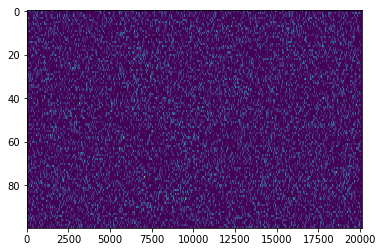

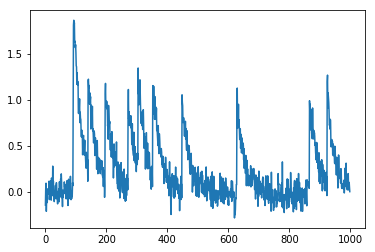

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd
from scipy import signal
# oasis needs some parameters
ops = {
        'tau':  1.,
        'niterneu': 5,
        'neumax': 1.,        
        'fs': 25.,
        'win':20.,
    }

# simulate some data
NT = 20000
p = .01
ncells = 100

sp = p - rnd.uniform(0,1,(NT,ncells))>0
kern = np.exp(-np.arange(100.)/(ops['fs'] * ops['tau']))

F = signal.convolve(np.expand_dims(kern, axis = 1), sp, mode='full')

plt.imshow(np.transpose(F), aspect='auto')
plt.show()
        
NT = F.shape[0]
ncells = F.shape[1]

F = F + rnd.normal(0,0.1,(NT,ncells))

#plt.imshow(np.transpose(F), aspect='auto')
plt.plot(F[1:1000,0])
plt.show()

1.411224365234375


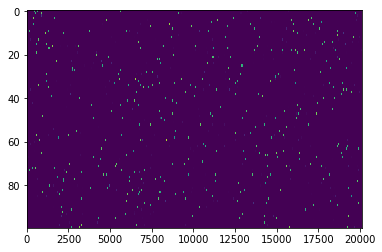

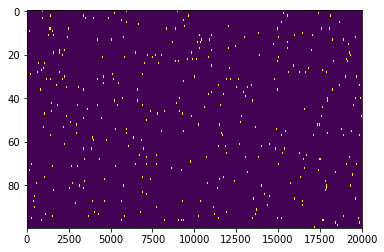

In [241]:
import dcnv, imp
imp.reload(dcnv)

Ft = np.transpose(F)

tstart = time.time()
s = dcnv.oasis(Ft, ops)
tend = time.time()

print(tend - tstart)

plt.imshow(s, aspect='auto')
plt.show()           

plt.imshow(np.transpose(sp), aspect='auto')
plt.show()           

In [244]:
i = 78
np.corrcoef(sp[:,i], s[i, :20000])

array([[1.        , 0.99441715],
       [0.99441715, 1.        ]])

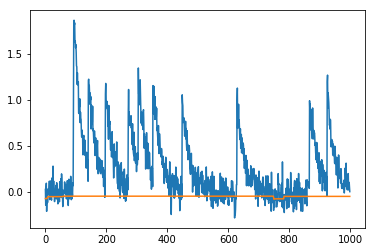

In [245]:
from scipy.ndimage import filters

Flow = filters.gaussian_filter(Ft,    1.)
Flow = filters.minimum_filter1d(Flow,    int(ops['win']*ops['fs']))
Flow = filters.maximum_filter1d(Flow, int(ops['win']*ops['fs']))

plt.plot(Ft[0,:1000])
plt.plot(Flow[0,:1000])
plt.show()

In [209]:
s.shape

(100, 20099)